## SQL For Business Analysis 

### What is the purpose of this notebook 🤔  
<font size='3'>🟢 This notebook is all about SQL at first we will introduce and recover some basics then will solve interview questions. </font>

<img src="https://media.giphy.com/media/vISmwpBJUNYzukTnVx/giphy.gif" width="650" align="center">

## 📚 Libraries

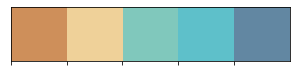

In [1]:
import numpy as np 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns


my_colors = ["#ce8f5a", "#efd199", "#80c8bc", "#5ec0ca", "#6287a2"]
sns.palplot(sns.color_palette(my_colors))

# Set Style

sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

class color:
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'

### Writing SQL in Jupyter notebook 🤨  
#### One way to do this is by using <b>pandasql</b>
 which you can preview its documentation from the link below 
 https://pypi.org/project/pandasql/

In [2]:
from pandasql import sqldf 

The main function used in pandasql is sqldf. sqldf accepts 2 parametrs

a sql query string

a set of session/environment variables (locals() or globals())

Specifying locals() or globals() can get tedious. You can define a short helper function to fix this.

In [3]:
sql =lambda x : sqldf(x, globals())
# this function will allow us to run sql more smoothly in our notebook

In [4]:

ls DataSets 


 Volume in drive F is TOSHIBA HDD
 Volume Serial Number is F40B-EF44

 Directory of f:\ANAS\My Work\SQL for Business Analysis\DataSets

02/26/2022  10:42 PM    <DIR>          .
02/26/2022  10:42 PM    <DIR>          ..
02/26/2022  10:40 PM           626,633 erdiagram.png
02/26/2022  10:39 PM         8,183,471 ev311.csv
02/26/2022  10:39 PM            81,501 fortune.csv
02/26/2022  10:39 PM         2,374,180 stackexchange.csv
               4 File(s)     11,265,785 bytes
               2 Dir(s)  686,273,150,976 bytes free


### Our database consists of the following tables and their foreign keys are shown below on the Entity Relationship diagram (E:R diagram)

<b>Foregin keys:</b> are the formal way that database tables are linked together.

* Reference another row in a different table or the same table via a <b>unique</b> ID. 
  The "Unique ID" often comes from a primary key column in the referenced table.

<b>Primary keys:</b> are specially designed columns where each row has a unique non-null value.

#### Note: the lack of a foregin key relationship just means that the values in the "ticker" columns are not restricted to the set of values in the other table. 


<img src="DataSets\erdiagram.png" width="650" align="center">

### About E:D diagram 

Entity-relationship diagram that shows the tables, their columns, and the relationships between the tables.


In [5]:
cd DataSets

f:\ANAS\My Work\SQL for Business Analysis\DataSets


In [6]:
ls

 Volume in drive F is TOSHIBA HDD
 Volume Serial Number is F40B-EF44

 Directory of f:\ANAS\My Work\SQL for Business Analysis\DataSets

02/26/2022  10:42 PM    <DIR>          .
02/26/2022  10:42 PM    <DIR>          ..
02/26/2022  10:40 PM           626,633 erdiagram.png
02/26/2022  10:39 PM         8,183,471 ev311.csv
02/26/2022  10:39 PM            81,501 fortune.csv
02/26/2022  10:39 PM         2,374,180 stackexchange.csv
               4 File(s)     11,265,785 bytes
               2 Dir(s)  686,273,150,976 bytes free


In [7]:
ev311 = pd.read_csv("ev311.csv")
fortune = pd.read_csv("fortune.csv")
stack_exchange = pd.read_csv("stackexchange.csv")

In [8]:
ev311 = sql("SELECT * FROM ev311 LIMIT 5")

fortune = sql("SELECT * FROM fortune LIMIT 5")

stack_exchange = sql("SELECT * FROM stack_exchange LIMIT 5")


In [9]:
ev311

,id,priority,source,category,date_created,date_completed,street,house_num,zip,description
0,1340563,NONE,gov.publicstuff.com,Fire Prevention - Inspection of a Commercial P...,2016-01-13T15:03:18Z,2016-01-19T16:51:26Z,Sheridan Road,606-612,60202.0,Please contact Debbie at Ext. 222
1,1826017,MEDIUM,Iframe,Water Service - Question or Concern,2016-08-12T14:35:12Z,2016-08-27T07:00:27Z,Washington St,930,NaN,Last spring we called you to report that our s...
2,1849204,MEDIUM,Iframe,Trees-Fallen limb or tree,2016-08-22T09:07:45Z,2016-08-24T07:05:32Z,Lincoln St,1183-1223,NaN,This isn't about a fallen tree or tree limb bu...
3,1880254,MEDIUM,iOS,Ask A Question / Send A Message,2016-09-01T09:03:54Z,2016-09-01T16:52:40Z,Callan Ave,1–111,60202.0,"Actually on back side of 621 Howard, growth in..."
4,1972582,MEDIUM,Iframe,Dead Animal on Public Property,2016-09-19T01:46:41Z,2016-09-27T11:28:50Z,Crain St,1524,NaN,This is not public property but I need help. ...
